## 🧠 Paso 3: Entrenamiento del modelo Isolation Forest

### 1. Preparar los datos

In [32]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib

df_clean = pd.read_csv("scripts/pipeline_energia_iot/data/consumo_potencia_min_limpio.csv", parse_dates=["dt"])
df_clean.set_index("dt", inplace=True)

In [33]:
df_clean.head()

,potencia,potencia_norm
dt,,
2025-05-05 00:00:00,5.24,0.093153
2025-05-05 00:01:00,5.00,0.074045
2025-05-05 00:02:00,5.49,0.113057
2025-05-05 00:03:00,4.90,0.066083
2025-05-05 00:04:00,4.89,0.065287


In [34]:
# Muestreo de datos cada 5 minutos en promedio
# df_clean = df_clean.resample('5T').mean()

### 2. Entrenar el modelo

In [35]:
# Usamos sólo la columna normalizada
X = df_clean[["potencia_norm"]]
# Entrenamos el modelo
modelo = IsolationForest(contamination=0.025, random_state=42)
modelo.fit(X)

IsolationForest(contamination=0.025, random_state=42)

* `contamination=0.01`: estima que el 1% de los datos son anómalos.
* Puedes ajustar este valor según la sensibilidad deseada.

### 3. Añadir predicción al dataset

In [36]:
df_clean["anomaly"] = modelo.predict(X)

* Resultado:

  * `-1` → Anomalía
  * `1` → Valor normal

### 4. Visualizar anomalías detectadas

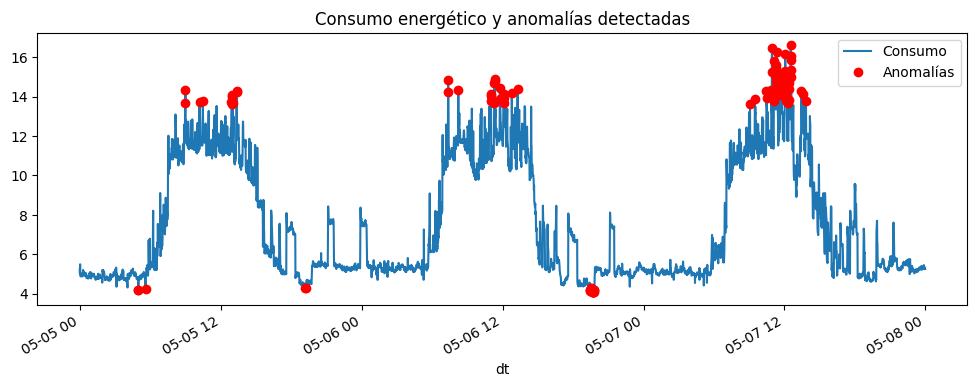

In [37]:
import matplotlib.pyplot as plt

df_clean["potencia"].plot(figsize=(12, 4), label="Consumo")
df_clean[df_clean["anomaly"] == -1]["potencia"].plot(
    style='ro', label="Anomalías"
)
plt.legend()
plt.title("Consumo energético y anomalías detectadas")
plt.show()

In [39]:
df_filter = df_clean[df_clean["anomaly"] == -1]
df_filter

,potencia,potencia_norm,anomaly
dt,,,
2025-05-05 04:59:00,4.18,0.008758,-1
2025-05-05 05:00:00,4.20,0.010350,-1
2025-05-05 05:36:00,4.24,0.013535,-1
2025-05-05 08:59:00,13.67,0.764331,-1
2025-05-05 09:00:00,14.35,0.818471,-1
...,...,...,...
2025-05-07 12:34:00,15.34,0.897293,-1
2025-05-07 12:35:00,14.99,0.869427,-1
2025-05-07 13:27:00,14.27,0.812102,-1


### 5. Guardar modelo para uso en tiempo real


In [38]:
joblib.dump(modelo, "scripts/pipeline_energia_iot/models/isolationforest.pkl")

['scripts/pipeline_energia_iot/models/isolationforest.pkl']

📌 Se ha implementado un script ejecutable y automatizable en la carpeta [scripts](scripts/pipeline_energia_iot/entrenar_modelo.py).

### 📊 Resultado esperado

Visualmente podrás ver puntos rojos en momentos de consumo anómalo, típicamente:

* Durante la madrugada
* En picos de potencia fuera de rango
* En patrones que el modelo considera inusuales